In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [23]:
# Load dataset
file_path = "./Dataset/AAPL_DATA.csv"  # Update with your file path if needed
data = pd.read_csv(file_path)

In [24]:
# Display first few rows
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
         Date    Open    High     Low   Close     Volume
0  2024-06-14  213.85  215.17  211.30  212.49   70122748
1  2024-06-17  213.37  218.95  212.72  216.67   93728300
2  2024-06-18  217.59  218.63  213.00  214.29   79943254
3  2024-06-20  213.93  214.24  208.85  209.68   86172451
4  2024-06-21  210.39  211.89  207.11  207.49  246421353


In [25]:
# Data Preprocessing
# Check for missing values
print("\nChecking for missing values:")
print(data.isnull().sum())
# Fill or drop missing values if needed
data = data.dropna()


Checking for missing values:
Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


In [26]:
# Convert 'Date' column to datetime and encode it
data['Date'] = pd.to_datetime(data['Date'])
data['Date_Encoded'] = data['Date'].map(lambda x: x.toordinal())  # Encode Date to numeric

In [27]:
# Define a new target column for classification: Buy/Sell/Hold
# Buy: Close > Open, Sell: Close < Open, Hold: Close == Open
conditions = [
    data['Close'] > data['Open'],
    data['Close'] < data['Open'],
    data['Close'] == data['Open']
]
choices = ['Buy', 'Sell', 'Hold']
data['Target'] = np.select(conditions, choices, default='Hold')

In [28]:
# Check class distribution
print("\nClass Distribution:")
print(data['Target'].value_counts())


Class Distribution:
Target
Buy     62
Sell    46
Name: count, dtype: int64


In [29]:

# Features and target variable
X = data[['Date_Encoded', 'Open', 'High', 'Low', 'Volume']]
y = data['Target']

In [30]:
# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [31]:
# Standardize features for Logistic Regression
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [32]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

In [33]:

# Train the Logistic Regression Model
model = LogisticRegression(random_state=42, multi_class='ovr', solver='liblinear')
model.fit(X_train, y_train)

c:\Users\gupta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='ovr', random_state=42, solver='liblinear')

In [34]:
# Make predictions
y_pred = model.predict(X_test)

In [35]:
print(y_pred)

[1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0]


In [36]:
# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Model Evaluation:
Accuracy: 0.86

Classification Report:
              precision    recall  f1-score   support

         Buy       0.82      1.00      0.90        14
        Sell       1.00      0.62      0.77         8

    accuracy                           0.86        22
   macro avg       0.91      0.81      0.84        22
weighted avg       0.89      0.86      0.85        22



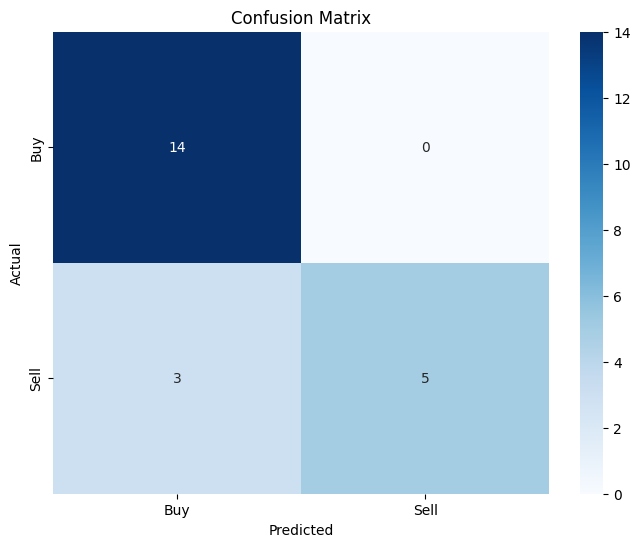

In [37]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [38]:
# Visualize Decision Boundaries (2D projection for simplicity)
from sklearn.decomposition import PCA

In [39]:

# Reduce features to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

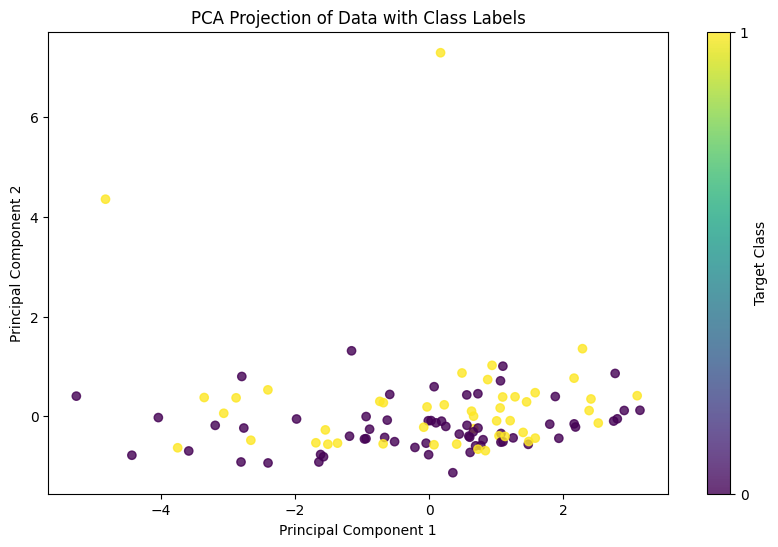

In [40]:

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_encoded, cmap='viridis', alpha=0.8)
plt.colorbar(scatter, ticks=range(len(label_encoder.classes_)), label='Target Class')
plt.title("PCA Projection of Data with Class Labels")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [41]:
import json

# Read data from the JSON file
with open('data_pass.json', 'r') as file:
    data = json.load(file)

print(data) 

[{'open': '220', 'high': '229.7400', 'low': '225.1700', 'volume': '44686020', 'close': 226.4}]


In [42]:
# Example input for prediction (replace with your value)
example_input = np.array([[data[0]['open'],data[0]['high'],data[0]['low'],data[0]["close"],data[0]['volume']]])  # Replace this with your desired value
example_input_scaled = scaler.transform(example_input)

# Predicting the Buy/Sell decision
predicted_decision = model.predict(example_input_scaled)
decision_label = 'Buy' if predicted_decision[0] == 1 else 'Sell'
print(f"Predicted Decision: {decision_label}")

Predicted Decision: Buy


c:\Users\gupta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
